In [ ]:
from dotenv import load_dotenv
import os
import datetime as dt
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
sns.set_style('whitegrid')
plt.style.use("bmh")
%matplotlib inline

In [ ]:
symbols = ['NVDA', 'AAPL', 'AMZN', 'MSFT']
dataframes = {}
for symbol in symbols:
    if not os.path.exists(f'{symbol}-market-data.csv'):
        stock = yf.Ticker(symbol)
        data = stock.history(period= 'max')
        data.reset_index(inplace=True)
        data.to_csv(f'{symbol}-market-data.csv', index = False, header=True)
        # print(data.head())
        dataframes[symbol] = data
    else:
        dataframes[symbol] = pd.read_csv(f'{symbol}-market-data.csv')

In [ ]:
def remove_time(date):
    date = dt.datetime.fromisoformat(str(date)).date() if date != dt.datetime.fromisoformat(str(date)).date() else date
    return date
for symbol in symbols:
    dataframes[symbol]['Date'] = dataframes[symbol]['Date'].apply(remove_time)

In [ ]:
for symbol in symbols:
    
    dataframes[symbol].to_csv(f'{symbol}-market-data.csv', index = False, header=True)
    print(f'Stock Market Data for {symbol} to {symbol}-market-data.csv')

Stock Market Data for NVDA to NVDA-market-data.csv
Stock Market Data for AAPL to AAPL-market-data.csv
Stock Market Data for AMZN to AMZN-market-data.csv
Stock Market Data for MSFT to MSFT-market-data.csv


In [ ]:
for symbol in symbols:
    dataframes[symbol].info()
    dataframes[symbol].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6720 non-null   object 
 1   Open          6720 non-null   float64
 2   High          6720 non-null   float64
 3   Low           6720 non-null   float64
 4   Close         6720 non-null   float64
 5   Volume        6720 non-null   int64  
 6   Dividends     6720 non-null   float64
 7   Stock Splits  6720 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 420.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11297 entries, 0 to 11296
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11297 non-null  object 
 1   Open          11297 non-null  float64
 2   High          11297 non-null  float64
 3   Low           11297 non-null  float64
 4   Close         11297 non-null 

In [ ]:
ma = [1,10,20,50]
for _ma in ma:
    for symbol in symbols:
        if _ma != 1:
            dataframes[symbol][f'Ma for {_ma} days'] = dataframes[symbol]['Close'].rolling(_ma).mean()

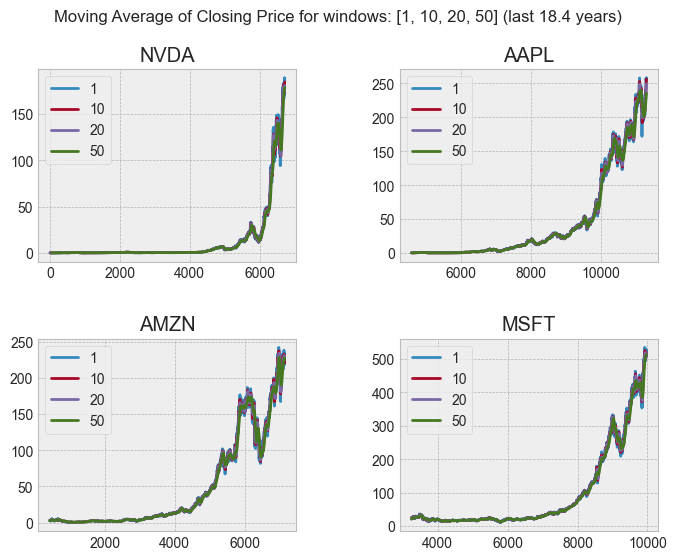

In [ ]:
recent_window = -6719
plt.figure(figsize=(8,6))
plt.suptitle(f'Moving Average of Closing Price for windows: {ma} (last {(recent_window/-365):.1f} years)')
for _ma in ma:
    for i,symbol in enumerate(symbols):
        plt.subplot(2,2,i+1)
        if _ma != 1:
            plt.plot(dataframes[symbol][f'Ma for {_ma} days'].iloc[recent_window:])
        else:
            plt.plot(dataframes[symbol]['Close'].iloc[recent_window:])
        plt.title(symbol)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.legend(ma)

plt.show()

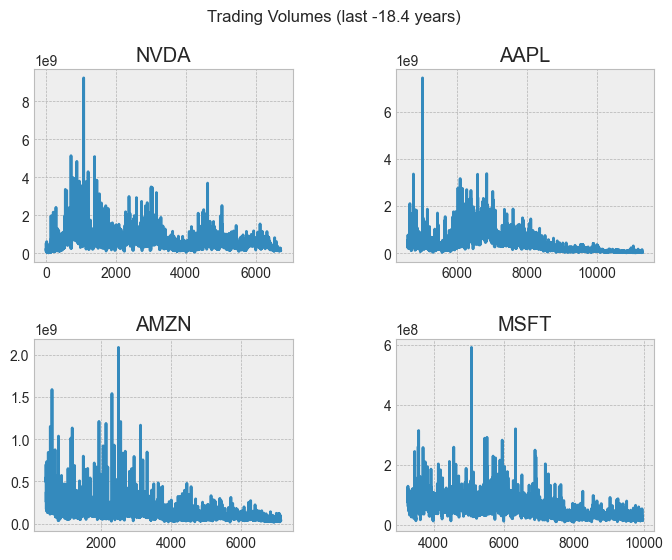

In [ ]:
plt.figure(figsize=(8,6))
plt.suptitle(f'Trading Volumes (last {(recent_window/365):.1f} years)')
for i,symbol in enumerate(symbols):
    plt.subplot(2, 2, i+1)
    plt.plot(dataframes[symbol]['Volume'].iloc[recent_window:])
    plt.title(symbol)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

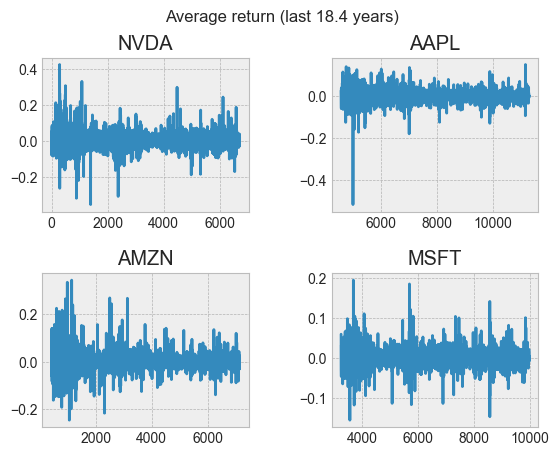

In [ ]:
plt.figure()
plt.suptitle(f'Average return (last {(recent_window/-365):.1f} years)')
for i, symbol in enumerate(symbols):
    plt.subplot(2,2,i+1)
    dataframes[symbol]['Returns'] = dataframes[symbol]['Close'].iloc[recent_window:].pct_change()
    plt.title(symbol)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.plot(dataframes[symbol]['Returns'])
plt.show()

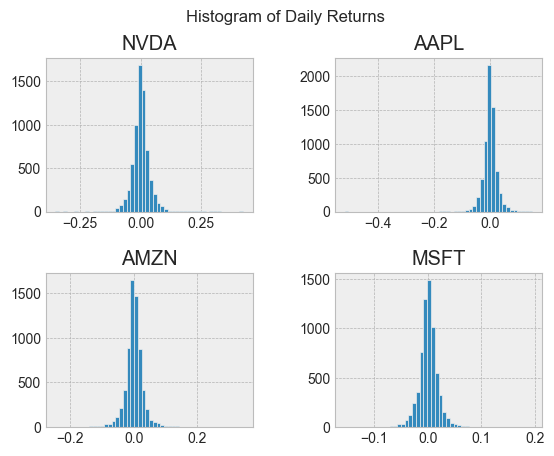

In [ ]:
plt.figure()
plt.suptitle(f'Histogram of Daily Returns')
for i, symbol in enumerate(symbols):
    plt.subplot(2,2,i+1)
    plt.title(symbol)
    dataframes[symbol]['Returns'].hist(bins=50)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

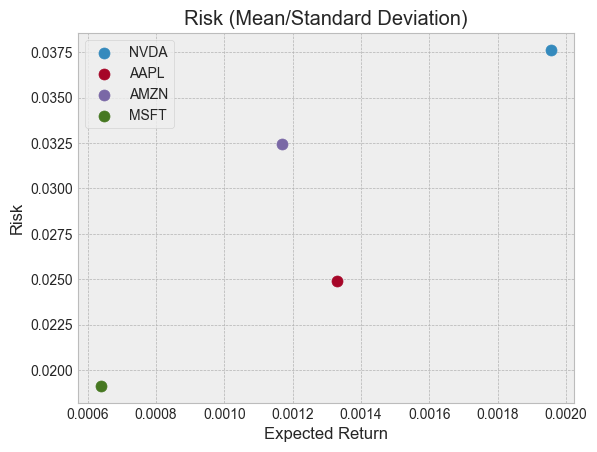

In [ ]:
plt.figure()
plt.title(f'Risk (Mean/Standard Deviation)')
for symbol in symbols:
    rets = dataframes[symbol]['Returns'].dropna()
    mean = rets.mean()
    std = rets.std()
    plt.scatter(mean,std, s = np.pi*20, label=symbol)
plt.legend()
plt.xlabel('Expected Return')
plt.ylabel('Risk')
# plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()